# AI-Powered Firewall Log Analysis and Threat Detection System

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.0f}'.format)
import scipy


d:\code\interview_assignment\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load the dataset

In [2]:
path_to_data = kagglehub.dataset_download("tunguz/internet-firewall-data-set")
print(f"Data downloaded to: {path_to_data}")
print(f"dir contains: {os.listdir(path_to_data)}")


Data downloaded to: C:\Users\koner\.cache\kagglehub\datasets\tunguz\internet-firewall-data-set\versions\1
dir contains: ['log2.csv']


In [3]:
df = pd.read_csv(path_to_data + "\log2.csv")


In [4]:
df.shape


(65532, 12)

In [5]:
df.to_csv("../data/raw_data.csv", index=False)


In [6]:
df.head()


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


- **Summary of Columns in the Firewall DataFrame:**
---  
<br>

| **Column Name**          | **Description**                                                                                      |
| ------------------------ | ---------------------------------------------------------------------------------------------------- |
| **Source Port**          | Port used by the source (initiator) of the connection.                                               |
| **Destination Port**     | Port on the destination (target) of the connection. Often indicates the service (e.g., 80 for HTTP). |
| **NAT Source Port**      | Translated source port assigned by the firewall during NAT.                                          |
| **NAT Destination Port** | Translated destination port after NAT.                                                               |
| **Action**               | Firewall decision for the connection: allowed or denied.                                             |
| **Bytes**                | Total bytes transferred during the session.                                                          |
| **Bytes Sent**           | Bytes sent from source to destination.                                                               |
| **Bytes Received**       | Bytes received by source from destination.                                                           |
| **Packets**              | Total number of packets exchanged in the session.                                                    |
| **Elapsed Time (sec)**   | Duration of the session in seconds.                                                                  |
| **pkts\_sent**           | Number of packets sent from source to destination.                                                   |
| **pkts\_received**       | Number of packets received from destination to source.                                               |


In [7]:
# list of columns
df.columns


Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [8]:
# remove the space in the column names and convert to lower case
df.columns = df.columns.str.replace(' ', '_').str.lower()


In [9]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [10]:
df.head()


,source_port,destination_port,nat_source_port,nat_destination_port,action,bytes,bytes_sent,bytes_received,packets,elapsed_time_(sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [11]:
df.action.value_counts()


action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

In [12]:
dict(enumerate(df['action'].astype('category').cat.categories))


{0: 'allow', 1: 'deny', 2: 'drop', 3: 'reset-both'}

In [13]:
## Summary of Columns in the Firewall DataFrame: 
df.describe()


,source_port,destination_port,nat_source_port,nat_destination_port,bytes,bytes_sent,bytes_received,packets,elapsed_time_(sec),pkts_sent,pkts_received
count,65532,65532,65532,65532,65532,65532,65532,65532,65532,65532,65532
mean,49392,10577,19283,2671,97124,22386,74738,103,66,41,61
std,15256,18466,21971,9739,5618439,3828139,2463208,5133,302,3219,2223
min,0,0,0,0,60,60,0,1,0,1,0
25%,49183,80,0,0,66,66,0,1,0,1,0
50%,53776,445,8820,53,168,90,79,2,15,1,1
75%,58638,15000,38366,443,752,210,449,6,30,3,2
max,65534,65535,65535,65535,1269359015,948477220,320881795,1036116,10824,747520,327208


In [14]:
## check for data types and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   source_port           65532 non-null  int64 
 1   destination_port      65532 non-null  int64 
 2   nat_source_port       65532 non-null  int64 
 3   nat_destination_port  65532 non-null  int64 
 4   action                65532 non-null  object
 5   bytes                 65532 non-null  int64 
 6   bytes_sent            65532 non-null  int64 
 7   bytes_received        65532 non-null  int64 
 8   packets               65532 non-null  int64 
 9   elapsed_time_(sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [15]:
## check for null values
df.isna().sum()


source_port             0
destination_port        0
nat_source_port         0
nat_destination_port    0
action                  0
bytes                   0
bytes_sent              0
bytes_received          0
packets                 0
elapsed_time_(sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [16]:
df.head()


,source_port,destination_port,nat_source_port,nat_destination_port,action,bytes,bytes_sent,bytes_received,packets,elapsed_time_(sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [17]:
df.drop_duplicates().shape


(57170, 12)

In [18]:
df.drop_duplicates(inplace=True)


In [19]:
df.shape


(57170, 12)

In [20]:
df.describe()


,source_port,destination_port,nat_source_port,nat_destination_port,bytes,bytes_sent,bytes_received,packets,elapsed_time_(sec),pkts_sent,pkts_received
count,57170,57170,57170,57170,57170,57170,57170,57170,57170,57170,57170
mean,50532,8052,22049,3054,111315,25647,85668,118,75,47,70
std,13881,16513,22142,10364,6015189,4098545,2637029,5495,323,3446,2380
min,0,0,0,0,60,60,0,1,0,1,0
25%,49450,53,0,0,70,70,0,1,0,1,0
50%,54013,443,16362,53,193,94,90,2,26,1,1
75%,58574,445,41884,443,1139,508,669,10,31,5,4
max,65534,65535,65535,65535,1269359015,948477220,320881795,1036116,10824,747520,327208


## EDA

## Univariate Analysis

### Column : action

In [21]:
## Action Counts
df['action'].value_counts()


action
allow         37439
drop          11635
deny           8042
reset-both       54
Name: count, dtype: int64

Text(0, 0.5, 'Count')

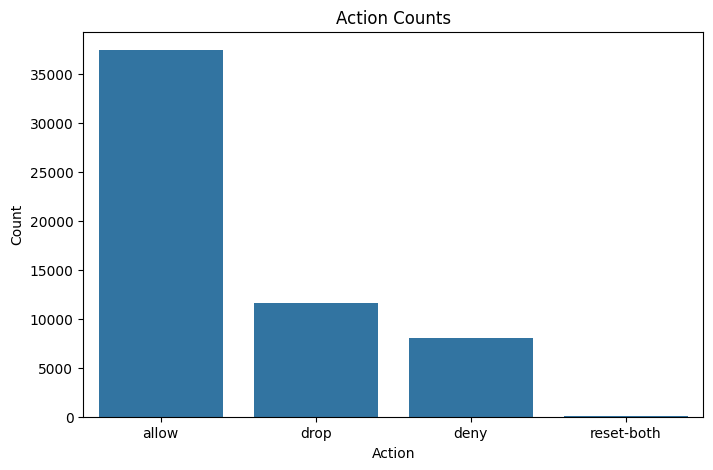

In [22]:
## Action Counts Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='action', order=df['action'].value_counts().index)
plt.title('Action Counts')
plt.xlabel('Action')
plt.ylabel('Count')


### Column : destination_port

In [23]:
## Top 10 Destination Ports
df['destination_port'].value_counts().head(10)


destination_port
53       15389
443      11684
445      11674
80        4035
25174      686
22114      490
50584      460
64147      396
44847      382
23         344
Name: count, dtype: int64

In [24]:
df['destination_port'].value_counts().head(10).keys()


Index([53, 443, 445, 80, 25174, 22114, 50584, 64147, 44847, 23], dtype='int64', name='destination_port')

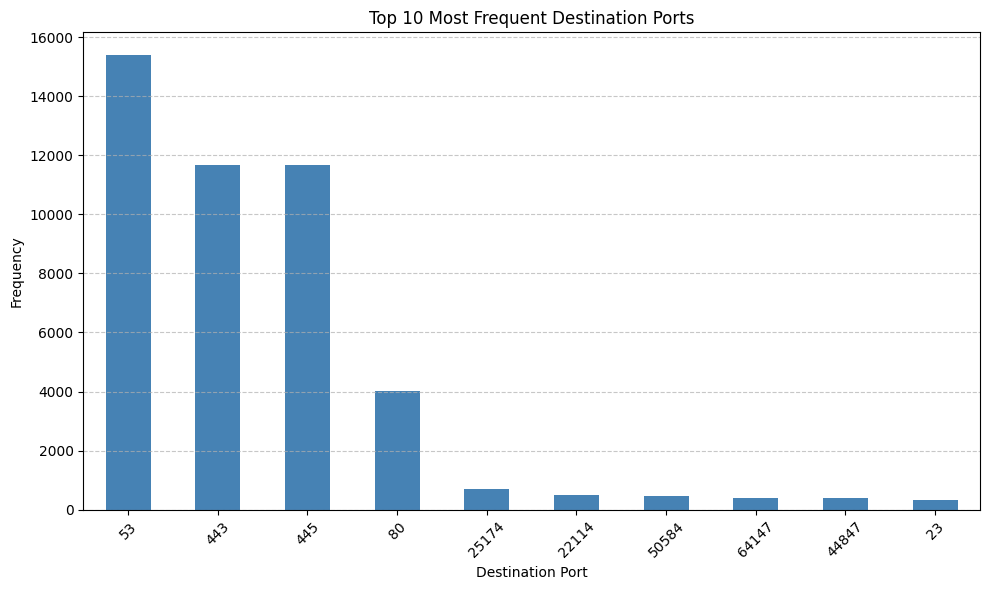

In [25]:
# Distribution of destination ports
plt.figure(figsize=(10, 6))
df['destination_port'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Frequent Destination Ports')
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
df.destination_port.describe()


count   57170
mean     8052
std     16513
min         0
25%        53
50%       443
75%       445
max     65535
Name: destination_port, dtype: float64

- So most of the ports that have been mostly used are less than 15000, with the highest being 65535. 
- Port 53 (DNS), 445 (SMB), 443 (HTTPS), and 80 (HTTP) are common service ports — their high frequency is expected.
- The uncommon high-numbered ports (e.g., 25174, 64147) could be dynamic ports used by malware or scanners — worth investigating further.

### Column : source_port

In [27]:
df['source_port'].describe()


count   57170
mean    50532
std     13881
min         0
25%     49450
50%     54013
75%     58574
max     65534
Name: source_port, dtype: float64

In [28]:
df['source_port'].value_counts().head(10)


source_port
27005    513
57470    222
49418    209
6881     145
443      135
50584    116
26900    102
42298     84
3478      80
48817     77
Name: count, dtype: int64

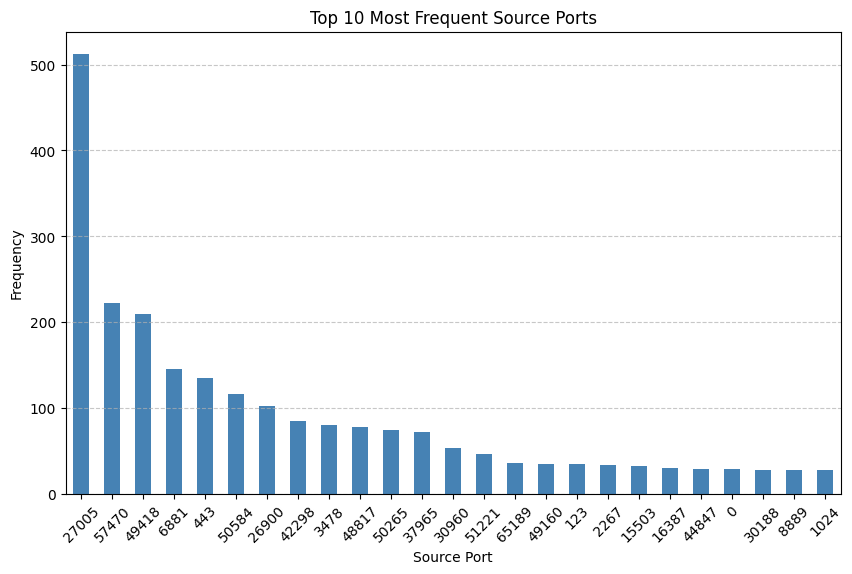

In [29]:
# plotted distribution of source ports
plt.figure(figsize=(10, 6))
df['source_port'].value_counts().head(25).plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Frequent Source Ports')
plt.xlabel('Source Port')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


### Column : nat_destionation_port

count   57170
mean     3054
std     10364
min         0
25%         0
50%        53
75%       443
max     65535
Name: nat_destination_port, dtype: float64

nat_destination_port
0        20125
53       15093
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       142
5228       100
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '53'),
  Text(2, 0, '443'),
  Text(3, 0, '80'),
  Text(4, 0, '27015'),
  Text(5, 0, '27017'),
  Text(6, 0, '123'),
  Text(7, 0, '3389'),
  Text(8, 0, '6881'),
  Text(9, 0, '5228')])

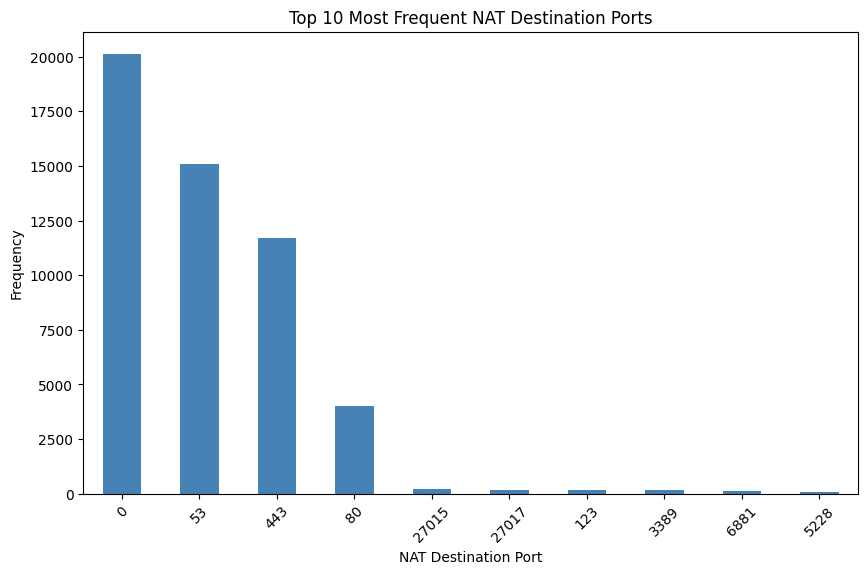

In [30]:

display(df['nat_destination_port'].describe())
display(df['nat_destination_port'].value_counts().head(10))
# Distribution of NAT Destination Ports
plt.figure(figsize=(10, 6))
df['nat_destination_port'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Frequent NAT Destination Ports')
plt.xlabel('NAT Destination Port')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


### Column : nat_source_port

count   57170
mean    22049
std     22142
min         0
25%         0
50%     16362
75%     41884
max     65535
Name: nat_source_port, dtype: float64

nat_source_port
0        20125
48817       78
50116        9
58638        9
30399        5
43757        5
7986         5
57596        5
14591        5
60868        5
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '48817'),
  Text(2, 0, '50116'),
  Text(3, 0, '58638'),
  Text(4, 0, '30399'),
  Text(5, 0, '43757'),
  Text(6, 0, '7986'),
  Text(7, 0, '57596'),
  Text(8, 0, '14591'),
  Text(9, 0, '60868')])

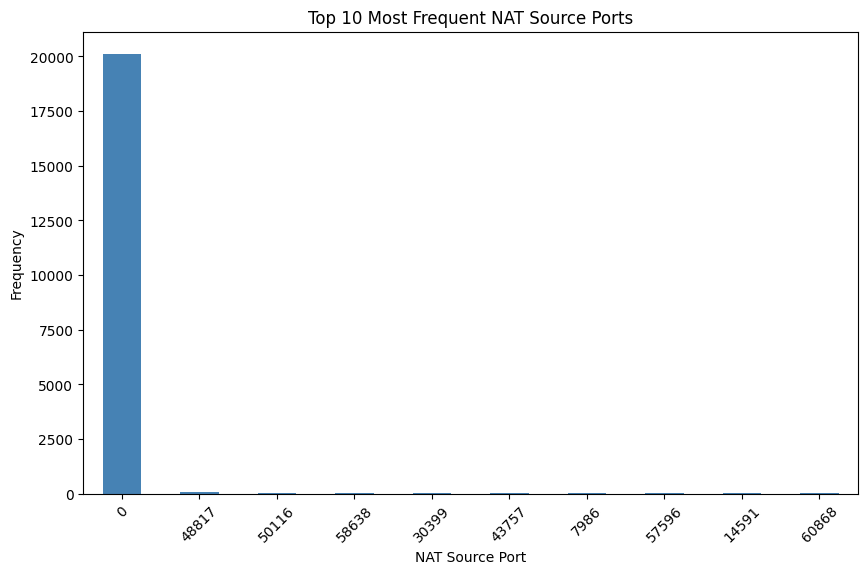

In [31]:

display(df['nat_source_port'].describe())
display(df['nat_source_port'].value_counts().head(10))
# Distribution of NAT Source Ports
plt.figure(figsize=(10, 6))
df['nat_source_port'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Frequent NAT Source Ports')
plt.xlabel('NAT Source Port')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


In [32]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

### Column : bytes

count        57170
mean        111315
std        6015189
min             60
25%             70
50%            193
75%           1139
max     1269359015
Name: bytes, dtype: float64

bytes
70     9483
66     6836
62     2804
146    1001
60      944
177     869
199     714
168     704
184     640
183     468
Name: count, dtype: int64

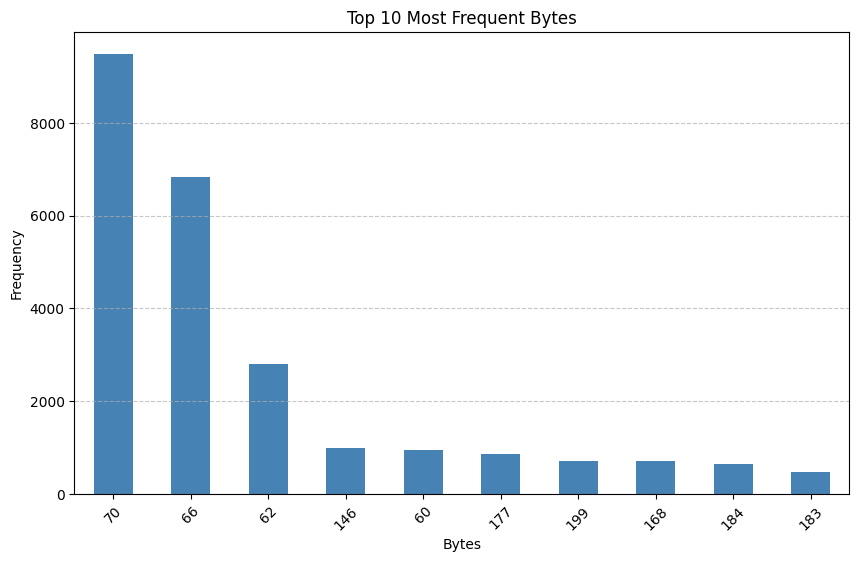

In [33]:
display(df['bytes'].describe())
display(df['bytes'].value_counts().head(10))
# Distribution of Bytes
plt.figure(figsize=(10, 6))
df['bytes'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Frequent Bytes')
plt.xlabel('Bytes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [34]:
df[df['bytes'] < 200].shape[0] / df.shape[0] * 100


54.61080986531398

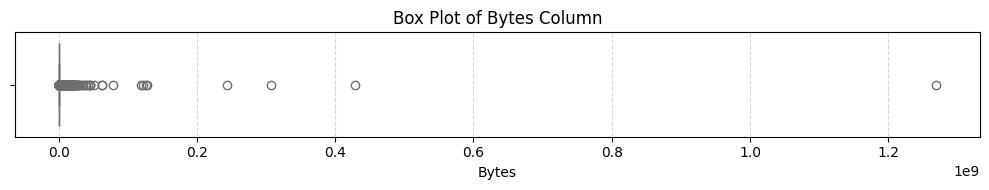

In [35]:
# Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['bytes'], color='skyblue')
plt.title('Box Plot of Bytes Column')
plt.xlabel('Bytes')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


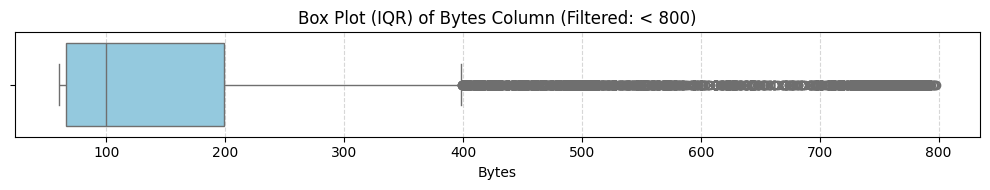

In [36]:
# Boxplot for bytes < 800
plt.figure(figsize=(10, 2))
sns.boxplot(x=df[df['bytes'] < 800]['bytes'], color='skyblue')
plt.title('Box Plot (IQR) of Bytes Column (Filtered: < 800)')
plt.xlabel('Bytes')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


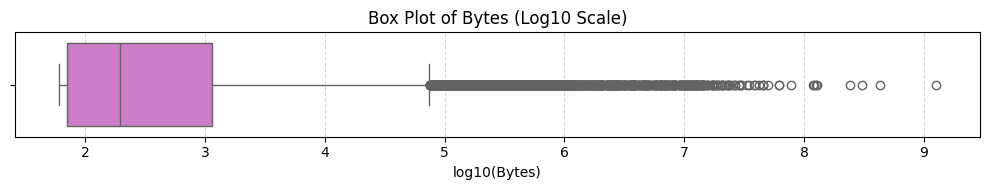

In [37]:
# Avoid log(0) error
df_log = df[df['bytes'] > 0].copy()
df_log['log_bytes'] = np.log10(df_log['bytes'])

# Plot log-scaled boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_log['log_bytes'], color='orchid')
plt.title('Box Plot of Bytes (Log10 Scale)')
plt.xlabel('log10(Bytes)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- 75% of the data is below 800 bytes, indicating that a significant portion of the data is concentrated in this range. 
This suggests that most network traffic consists of smaller packets, while larger packets are less common.
- The boxplot shows that there are some outliers in the data, particularly for larger byte values, which may represent unusual network activity or specific types of traffic.

### Column : bytes_sent

In [38]:
df.bytes_sent.describe()


count       57170
mean        25647
std       4098545
min            60
25%            70
50%            94
75%           508
max     948477220
Name: bytes_sent, dtype: float64

In [39]:
def plot_bar_and_box(df, column, top_n=10, log_scale=False, threshold=800):
    """
    Plots top N most frequent values as a bar chart and a boxplot side by side for the given column.

    Parameters:
    - df: pandas DataFrame
    - column: str, name of the column to analyze
    - top_n: int, number of top frequent values to show in bar plot
    - log_scale: bool, apply log10 transformation for boxplot
    - threshold: numeric, max value to show in boxplot (for filtering out extreme outliers)
    """
    plt.figure(figsize=(14, 5))

    # Bar plot (Top N most frequent)
    plt.subplot(1, 2, 1)
    top_counts = df[column].value_counts().head(top_n)
    top_counts.plot(kind='bar', color='steelblue')
    plt.title(f'Top {top_n} Most Frequent {column}')
    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Boxplot (with optional log scale and threshold)
    plt.subplot(1, 2, 2)
    data = df[df[column] > 0][column] if log_scale else df[column]
    
    # Apply log if needed
    if log_scale:
        data = np.log10(data)
        label = f'log10({column})'
        # Also apply log to threshold
        data = data[data < np.log10(threshold)]
    else:
        data = data[data < threshold]
        label = column

    sns.boxplot(x=data, color='skyblue')
    plt.title(f'Box Plot of {column}' + (' (Log Scale)' if log_scale else ''))
    plt.xlabel(label)
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


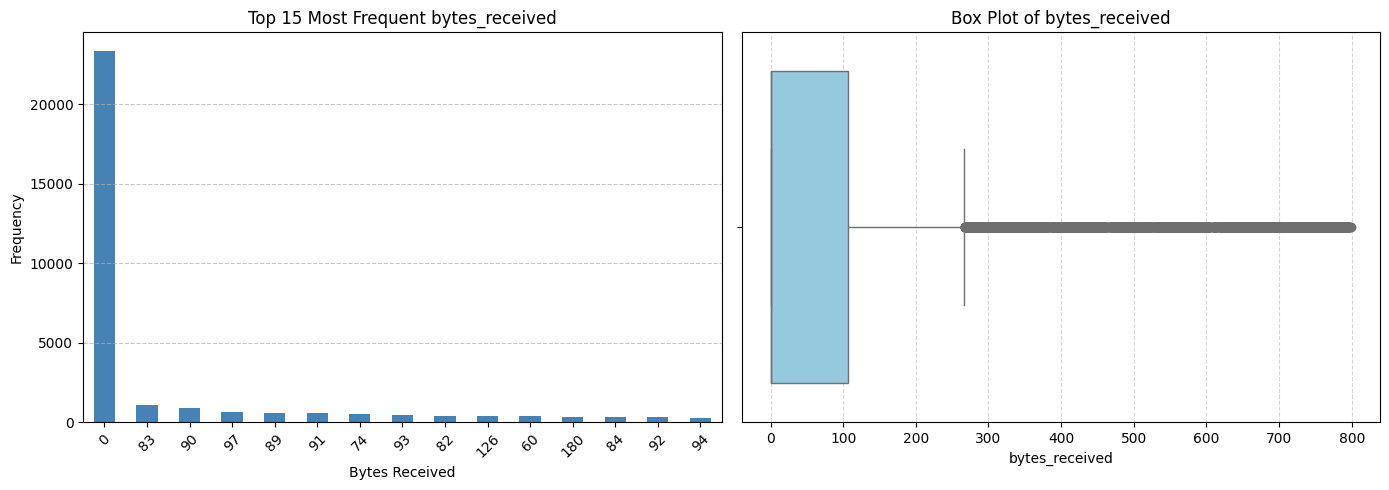

In [40]:
plot_bar_and_box(df, 'bytes_received', top_n=15)  


### Column : bytes_received

In [41]:
df['bytes_received'].describe()


count       57170
mean        85668
std       2637029
min             0
25%             0
50%            90
75%           669
max     320881795
Name: bytes_received, dtype: float64

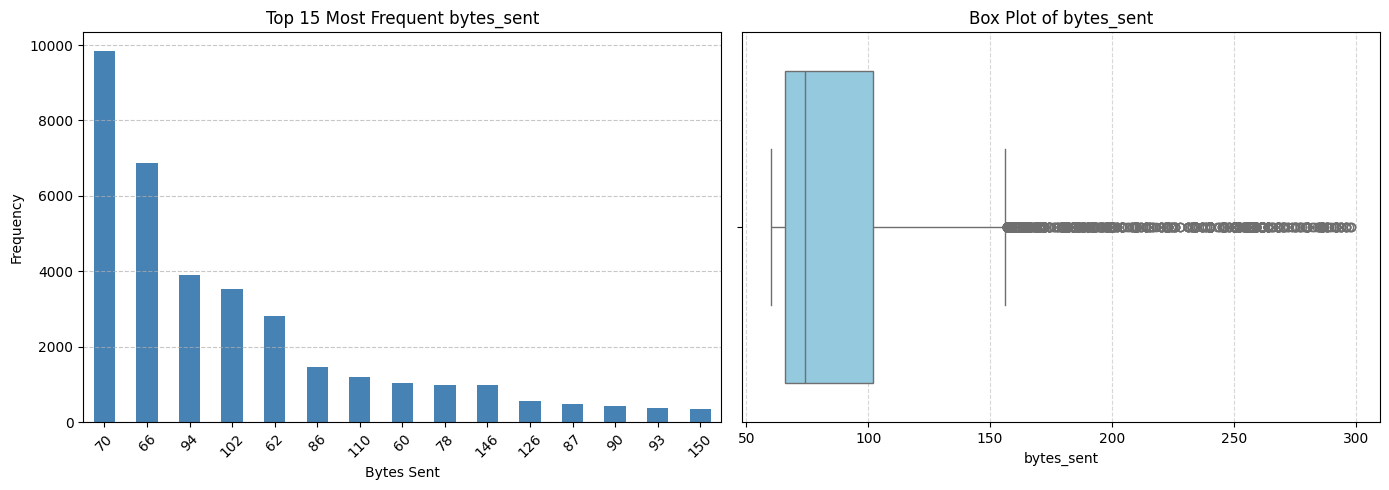

In [42]:
plot_bar_and_box(df, 'bytes_sent', top_n=15, threshold=300)


### Column : packets

In [43]:
df.packets.describe()


count     57170
mean        118
std        5495
min           1
25%           1
50%           2
75%          10
max     1036116
Name: packets, dtype: float64

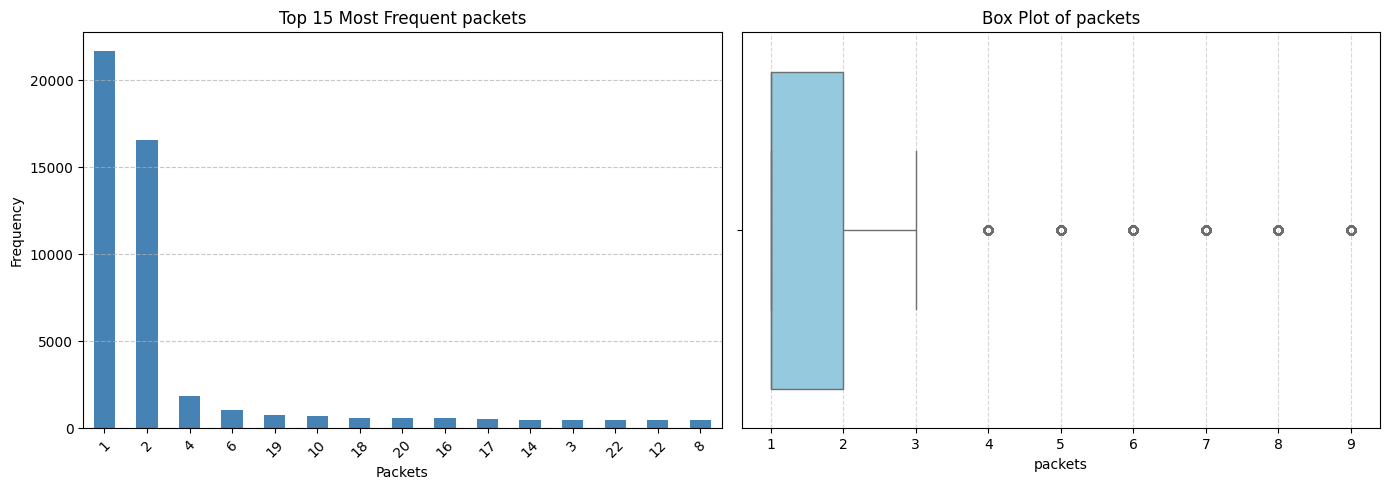

In [44]:
plot_bar_and_box(df, 'packets', top_n=15, threshold=10)


### Column : packets_sent

In [45]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [46]:
df.pkts_sent.describe()


count    57170
mean        47
std       3446
min          1
25%          1
50%          1
75%          5
max     747520
Name: pkts_sent, dtype: float64

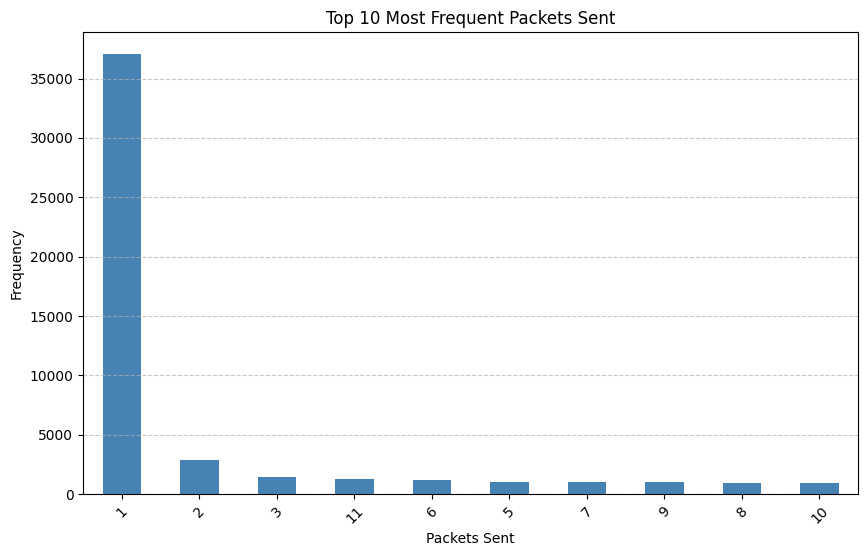

In [47]:
## plot the value counts of 'pkts_sent'
plt.figure(figsize=(10, 6))
df['pkts_sent'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Frequent Packets Sent')
plt.xlabel('Packets Sent')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


### Column : pkts_received

In [48]:
df.pkts_received.describe()


count    57170
mean        70
std       2380
min          0
25%          0
50%          1
75%          4
max     327208
Name: pkts_received, dtype: float64

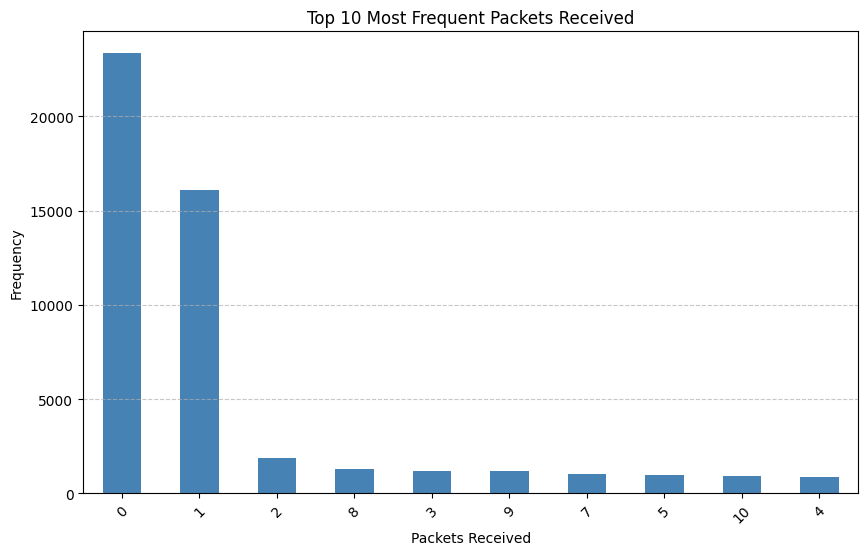

In [49]:
### plot the value counts of 'pkts_received'
plt.figure(figsize=(10, 6))
df['pkts_received'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Frequent Packets Received')
plt.xlabel('Packets Received')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


### Column : elapsed_time_(sec)

In [50]:
df['elapsed_time_(sec)'].describe()


count   57170
mean       75
std       323
min         0
25%         0
50%        26
75%        31
max     10824
Name: elapsed_time_(sec), dtype: float64

In [51]:
df[df['elapsed_time_(sec)'] == 0].shape[0] / df.shape[0] * 100


35.04285464404408

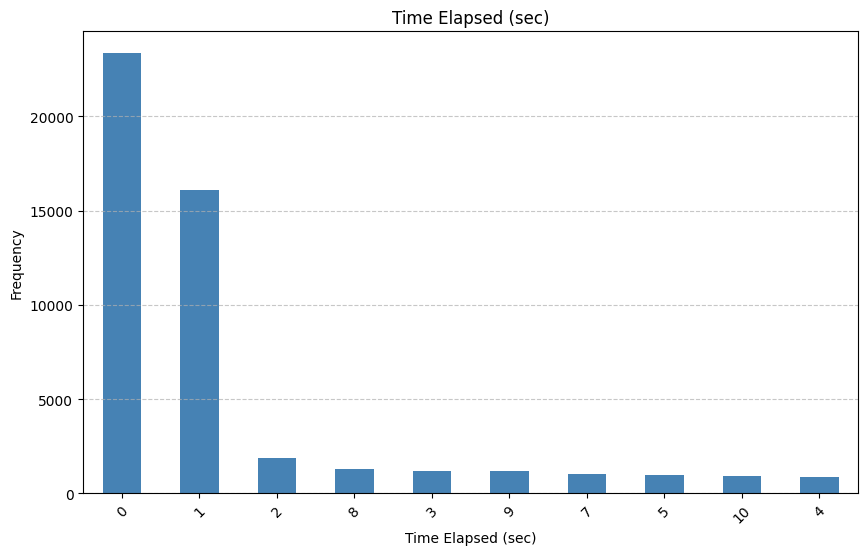

In [52]:
### plot the value counts of 'pkts_received'
plt.figure(figsize=(10, 6))
df['pkts_received'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Time Elapsed (sec)')
plt.xlabel('Time Elapsed (sec)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


### Column : action

In [53]:
df.action.value_counts()


action
allow         37439
drop          11635
deny           8042
reset-both       54
Name: count, dtype: int64

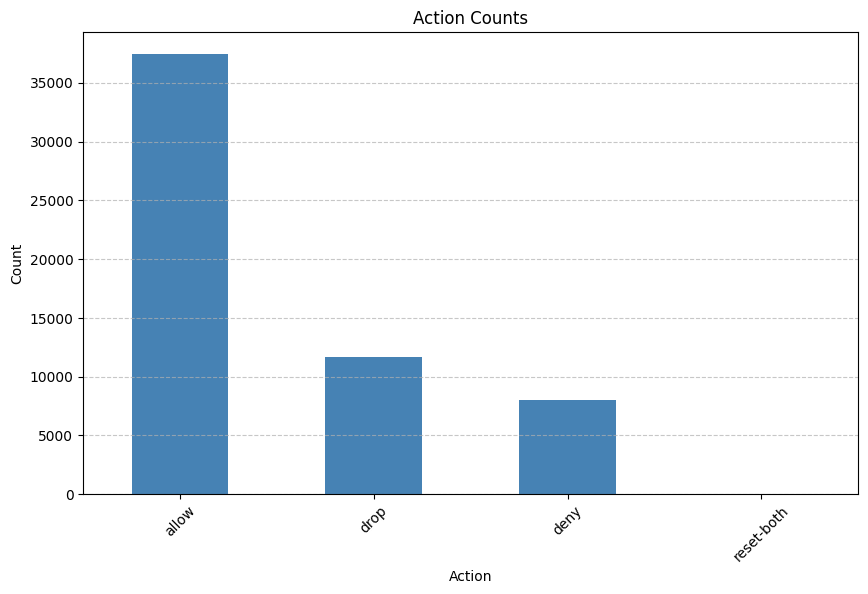

In [54]:
### plot action counts
plt.figure(figsize=(10, 6))
df['action'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Action Counts')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


## Multivariate Analysis

In [55]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [56]:
## numerical columns
num_cols = ['source_port',
 'destination_port',
 'nat_source_port',
 'nat_destination_port',
 'bytes',
 'bytes_sent',
 'bytes_received',
 'packets',
 'pkts_sent',
 'pkts_received',
 'elapsed_time_(sec)']


In [57]:
# df[num_cols].corr()
corr = df.corr(numeric_only=True)
corr


,source_port,destination_port,nat_source_port,nat_destination_port,bytes,bytes_sent,bytes_received,packets,elapsed_time_(sec),pkts_sent,pkts_received
source_port,1,-0,0,-0,-0,-0,-0,-0,-0,-0,-0
destination_port,-0,1,-0,1,-0,0,-0,-0,0,-0,-0
nat_source_port,0,-0,1,0,0,0,0,0,0,0,0
nat_destination_port,-0,1,0,1,0,0,-0,0,0,0,0
bytes,-0,-0,0,0,1,1,1,1,0,1,1
bytes_sent,-0,0,0,0,1,1,1,1,0,1,1
bytes_received,-0,-0,0,-0,1,1,1,1,0,1,1
packets,-0,-0,0,0,1,1,1,1,0,1,1
elapsed_time_(sec),-0,0,0,0,0,0,0,0,1,0,0
pkts_sent,-0,-0,0,0,1,1,1,1,0,1,1


In [58]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

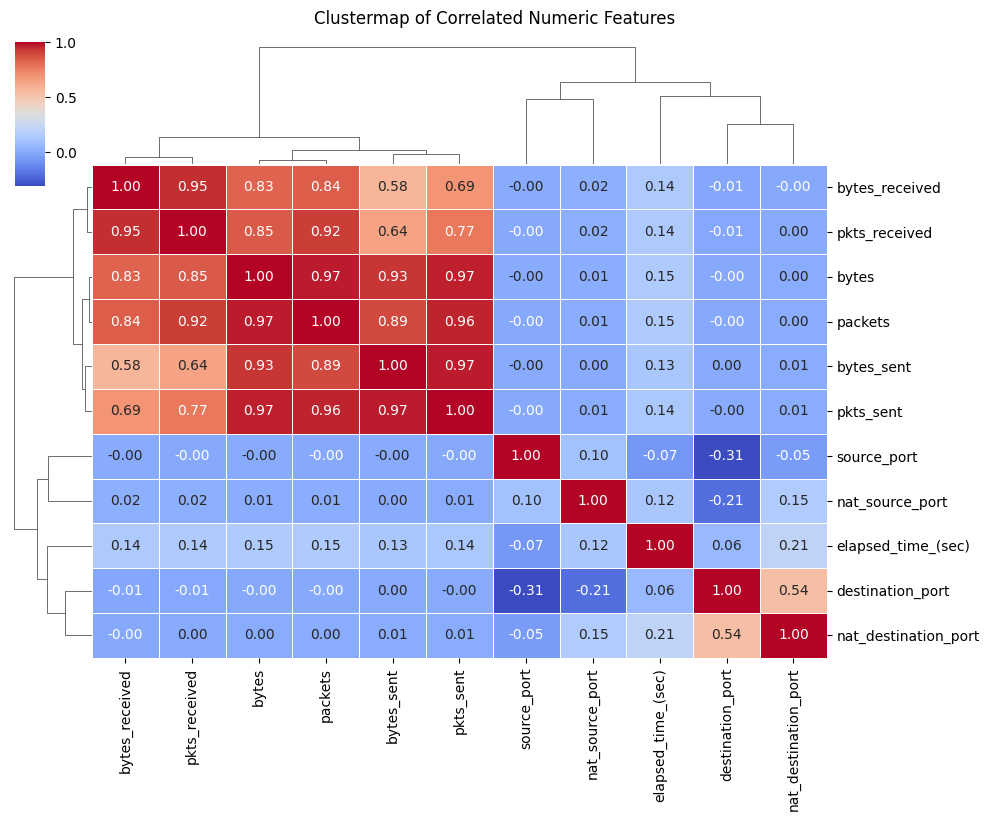

In [59]:
sns.clustermap(
    corr,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    figsize=(10, 8),
    dendrogram_ratio=(.1, .2),  # Shrinks dendrograms for clarity
    cbar_pos=(0.02, 0.8, 0.03, 0.18)  # Custom colorbar placement
)

plt.suptitle("Clustermap of Correlated Numeric Features", y=1.02)
plt.show()


In [60]:
### Heatmap for numerial columns
def plot_correlation_matrix(df, figsize=(12, 8)):
    numeric_cols = df.select_dtypes(include='number').columns
    corr = df[numeric_cols].corr()

    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()





In [61]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

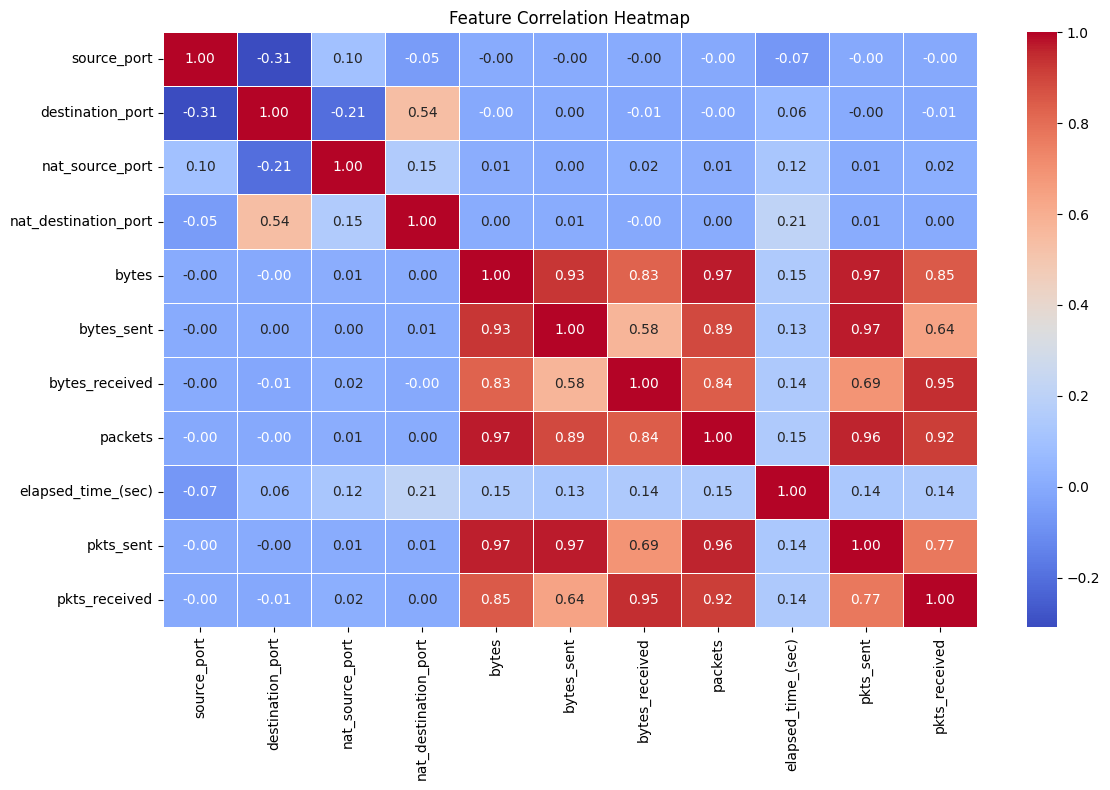

In [62]:
plot_correlation_matrix(df)


In [63]:
# sns.pairplot(df[[ 
#     'bytes', 'packets', 
#     # 'bytes_sent', 'bytes_received', 'pkts_sent', 'pkts_received'
# ]])
# plt.suptitle("Pairwise Relationships of Key Metrics", y=1.02)
# plt.show()


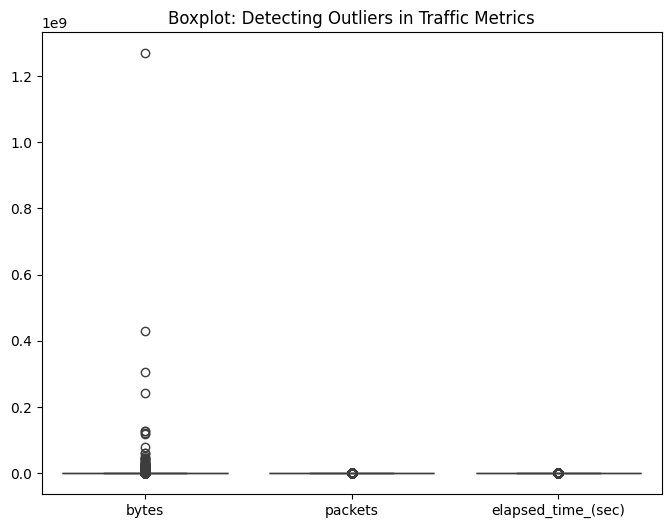

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['bytes', 'packets', 'elapsed_time_(sec)']])
plt.title("Boxplot: Detecting Outliers in Traffic Metrics")
plt.show()


In [65]:
df.head()


,source_port,destination_port,nat_source_port,nat_destination_port,action,bytes,bytes_sent,bytes_received,packets,elapsed_time_(sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [66]:
df.groupby('action').agg(
    unique_source_ports=('source_port', 'nunique'),
    unique_destination_ports=('destination_port', 'nunique'),
    unique_nat_source_ports=('nat_source_port', 'nunique'),
    unique_nat_destination_ports=('nat_destination_port', 'nunique'),
    mean_bytes=('bytes', 'mean'),
    mean_bytes_sent=('bytes_sent', 'mean'),
    mean_bytes_received=('bytes_received', 'mean'),
    mean_packets=('packets', 'mean'),
    mean_pkts_sent=('pkts_sent', 'mean'),
    mean_pkts_received=('pkts_received', 'mean'),
    mean_elapsed_time=('elapsed_time_(sec)', 'mean')
).T


action,allow,deny,drop,reset-both
unique_source_ports,16640,5305,9762,50
unique_destination_ports,2572,747,1,16
unique_nat_source_ports,29139,12,1,13
unique_nat_destination_ports,2530,7,1,2
mean_bytes,169938,91,69,157
mean_bytes_sent,39122,91,69,142
mean_bytes_received,130816,0,0,16
mean_packets,179,1,1,2
mean_pkts_sent,72,1,1,1
mean_pkts_received,108,0,0,0


**Feature engineering**

| Feature Name       | Formula                                      | Purpose                                                             |
| ------------------ | -------------------------------------------- | ------------------------------------------------------------------- |
| `bytes_per_second` | `Bytes / (Elapsed Time (sec) + 1)`           | Detects high-volume transfers or flooding attacks                   |
| `packet_rate`      | `Packets / (Elapsed Time (sec) + 1)`         | Spots bursty/DoS-style attacks or rapid scans                       |
| `direction_ratio`  | `Bytes Sent / (Bytes Received + 1)`          | Detects imbalanced flows (exfiltration or downloads)                |
| `response_rate`    | `pkts_received / (pkts_sent + 1)`            | Close to 0 → destination not responding (e.g., blocked or scanning) |
| `session_success`  | `(Bytes Received > 0) & (pkts_received > 0)` | Boolean indicator of successful bi-directional communication        |


In [67]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [68]:

df['bytes_per_sec'] = df['bytes'] / (df['elapsed_time_(sec)'] + 1e-6)  # Avoid division by zero
df['packets_per_sec'] = df['packets'] / (df['elapsed_time_(sec)'] + 1e-6)

df['bytes_ratio'] = df['bytes_sent'] / (df['bytes_received'] + 1)
df['packets_ratio'] = df['pkts_sent'] / (df['pkts_received'] + 1)

# Correct bi-directional session flag
df['bi_directional_sessions'] = np.where(
    (df['bytes_received'] > 0) & (df['bytes_sent'] > 0), 1, 0
)


In [133]:
df['burst_transfer'] = np.where(df['bytes_per_sec'] > df['bytes_per_sec'].quantile(0.99), 1, 0)
df['low_activity'] = np.where((df['bytes'] < 100) & (df['elapsed_time_(sec)'] > 10), 1, 0)
df['high_activity'] = np.where((df['bytes'] > 10000) & (df['elapsed_time_(sec)'] < 5), 1, 0)


In [134]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received', 'bytes_per_sec', 'packets_per_sec', 'bytes_ratio',
       'packets_ratio', 'bi_directional_sessions', 'burst_transfer',
       'low_activity', 'high_activity', 'log_bytes', 'log_bytes_sent',
       'log_bytes_received', 'log_bytes_ratio', 'log_bytes_per_sec',
       'log_packets', 'log_elapsed', 'log_packets_per_sec'],
      dtype='object')

In [135]:
df.head(10)


,source_port,destination_port,nat_source_port,nat_destination_port,action,bytes,bytes_sent,bytes_received,packets,elapsed_time_(sec),...,low_activity,high_activity,log_bytes,log_bytes_sent,log_bytes_received,log_bytes_ratio,log_bytes_per_sec,log_packets,log_elapsed,log_packets_per_sec
0,57222,53,54587,53,allow,177,94,83,2,30,...,0,0,5,5,4,0,2,1,3,0
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,...,0,0,8,7,8,-1,6,3,3,1
2,6881,50321,43265,50321,allow,238,118,120,2,1199,...,0,0,5,5,5,-0,0,1,7,0
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,...,0,0,8,7,8,-0,5,3,3,1
4,50002,443,45848,443,allow,25358,6778,18580,31,16,...,0,0,10,9,10,-1,7,3,3,1
5,51465,443,39975,443,allow,3961,1595,2366,21,16,...,0,0,8,7,8,-0,6,3,3,1
6,60513,47094,45469,47094,allow,320,140,180,6,7,...,0,0,6,5,5,-0,4,2,2,1
7,50049,443,21285,443,allow,7912,3269,4643,23,96,...,0,0,9,8,8,-0,4,3,5,0
8,52244,58774,2211,58774,allow,70,70,0,1,5,...,0,0,4,4,0,18,3,1,2,0
9,50627,443,16215,443,allow,8256,1674,6582,31,75,...,0,0,9,7,9,-1,5,3,4,0


In [136]:
df.burst_transfer.value_counts()


burst_transfer
0    56600
1      570
Name: count, dtype: int64

In [137]:
df.bytes_per_sec.describe()


count        57170
mean      29740677
std       70888586
min              0
25%              9
50%             98
75%       66000000
max     5815000000
Name: bytes_per_sec, dtype: float64

In [138]:
# ports with high activity
# df[df.high_activity == ]['destination_port'].value_counts()


In [139]:
df[df.high_activity == 1].shape


(1, 28)

In [140]:
df.bytes.describe()


count        57170
mean        111315
std        6015189
min             60
25%             70
50%            193
75%           1139
max     1269359015
Name: bytes, dtype: float64

In [ ]:
df[df['burst_transfer'] == 1]['destination_port'].value_counts().head()


destination_port
443      272
61463     76
53        27
0         15
26296     14
Name: count, dtype: int64

In [144]:
df[df['burst_transfer'] == 1]['destination_port'].value_counts().head(10).index, df[df['burst_transfer'] == 1]['destination_port'].value_counts().head(10).values


(Index([443, 61463, 53, 0, 26296, 10387, 123, 3389, 8055, 47807], dtype='int64', name='destination_port'),
 array([272,  76,  27,  15,  14,  13,   7,   5,   5,   4], dtype=int64))

<Axes: xlabel='destination_port'>

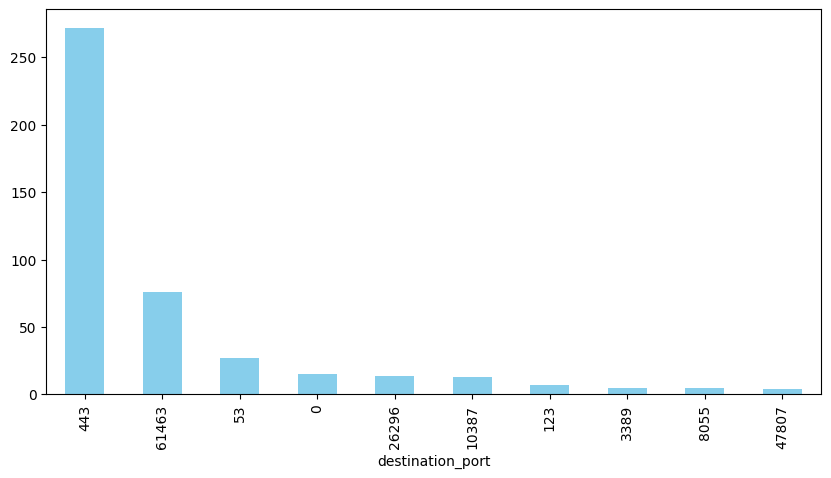

In [147]:
df[df['burst_transfer'] == 1]['destination_port'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')


In [148]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received', 'bytes_per_sec', 'packets_per_sec', 'bytes_ratio',
       'packets_ratio', 'bi_directional_sessions', 'burst_transfer',
       'low_activity', 'high_activity', 'log_bytes', 'log_bytes_sent',
       'log_bytes_received', 'log_bytes_ratio', 'log_bytes_per_sec',
       'log_packets', 'log_elapsed', 'log_packets_per_sec'],
      dtype='object')

In [ ]:
df.groupby('action').agg(
    bytes_per_sec_agg = ('bytes_per_sec', 'mean')
)


,bytes_per_sec_agg
action,
allow,4374409
deny,91071500
drop,68556768
reset-both,119370408


: 

<Axes: xlabel='action'>

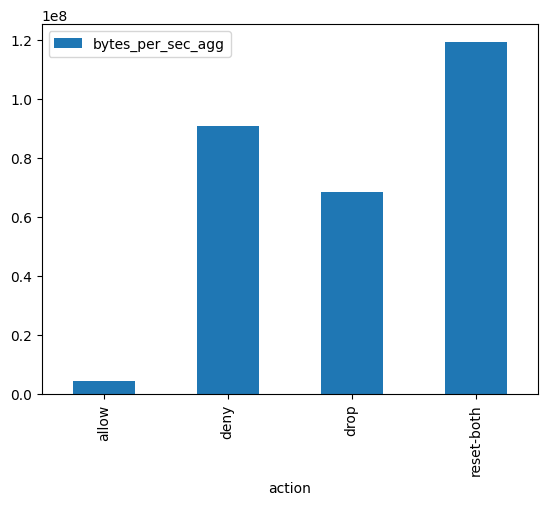

In [150]:
df.groupby('action').agg(
    bytes_per_sec_agg = ('bytes_per_sec', 'mean')
).plot(kind='bar')


In [74]:
df['log_bytes'] = np.log1p(df['bytes'])
df['log_bytes_sent'] = np.log1p(df['bytes_sent'])
df['log_bytes_received'] = np.log1p(df['bytes_received'])
df['log_bytes_ratio'] = np.log(df['bytes_sent'] + 1e-6) - np.log(df['bytes_received'] + 1e-6)
df['log_bytes_per_sec'] = np.log1p(df['bytes_per_sec'])

df['log_packets'] = np.log1p(df['packets'])
df['log_elapsed'] = np.log1p(df['elapsed_time_(sec)'])
df['log_packets_per_sec'] = np.log1p(df['packets'] / (df['elapsed_time_(sec)'] + 1e-6))


In [75]:
df.log_bytes_per_sec.describe()


count   57170
mean        9
std         7
min         0
25%         2
50%         5
75%        18
max        22
Name: log_bytes_per_sec, dtype: float64

In [76]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received', 'bytes_per_sec', 'packets_per_sec', 'bytes_ratio',
       'packets_ratio', 'bi_directional_sessions', 'burst_transfer',
       'low_activity', 'high_activity', 'log_bytes', 'log_bytes_sent',
       'log_bytes_received', 'log_bytes_ratio', 'log_bytes_per_sec',
       'log_packets', 'log_elapsed', 'log_packets_per_sec'],
      dtype='object')

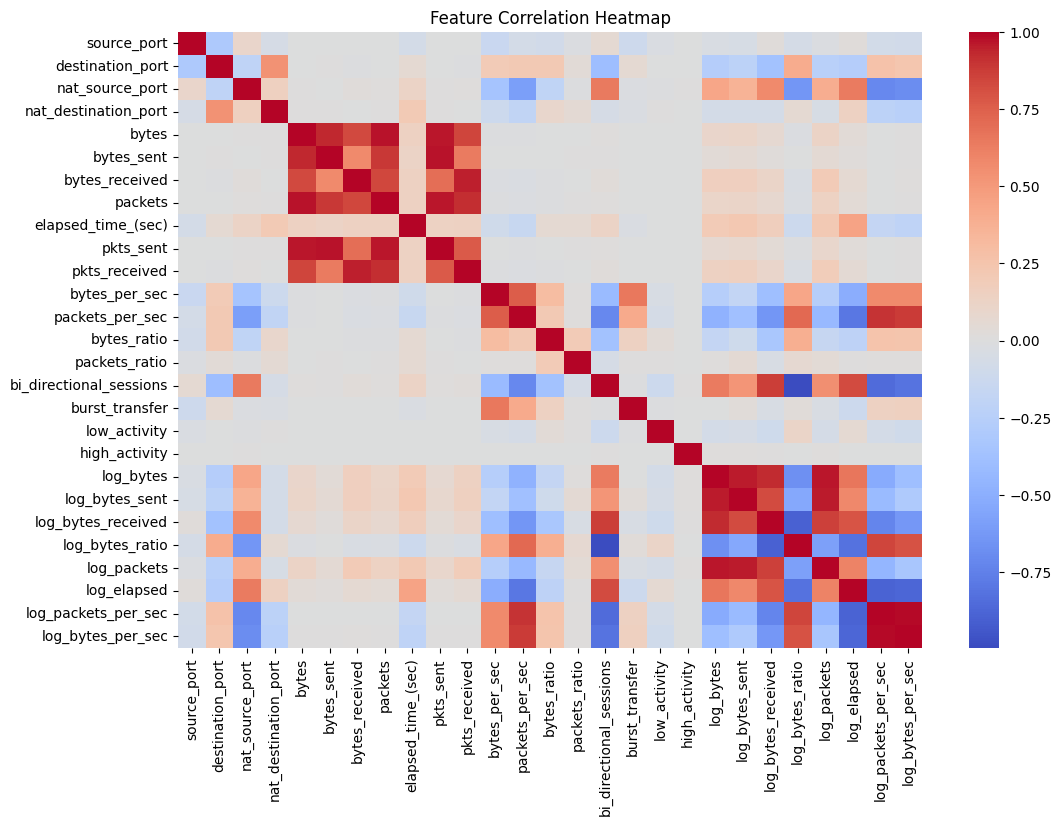

In [77]:
# Select only the numeric columns
numeric_cols = [
    'source_port', 'destination_port', 'nat_source_port', 'nat_destination_port',
    'bytes', 'bytes_sent', 'bytes_received', 'packets', 'elapsed_time_(sec)',
    'pkts_sent', 'pkts_received', 'bytes_per_sec', 'packets_per_sec',
    'bytes_ratio', 'packets_ratio', 'bi_directional_sessions', 'burst_transfer',
    'low_activity', 'high_activity', 'log_bytes', 'log_bytes_sent',
    'log_bytes_received', 'log_bytes_ratio', 'log_packets', 'log_elapsed',
    'log_packets_per_sec', 'log_bytes_per_sec'
]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


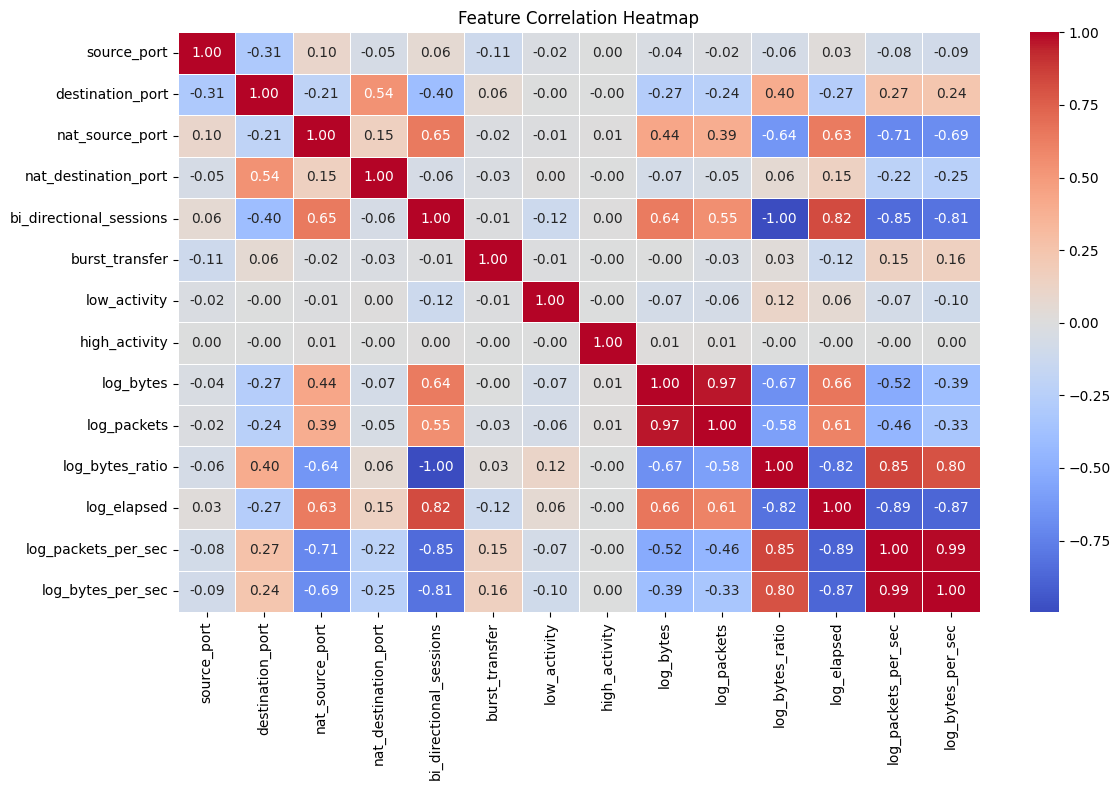

In [78]:
final_features = [
    'source_port', 'destination_port', 'nat_source_port', 'nat_destination_port',
    # 'action',  # if categorical, you may encode it
    'bi_directional_sessions', 'burst_transfer', 'low_activity', 'high_activity',
    'log_bytes', 'log_packets', 'log_bytes_ratio', 'log_elapsed',
    'log_packets_per_sec', 'log_bytes_per_sec'
]

plot_correlation_matrix(df[final_features], figsize=(12, 8))
# df[final_features].corr().style.background_gradient(cmap='coolwarm')


In [79]:
final_columns = [
    'source_port',
    'destination_port',
    'nat_source_port',
    'nat_destination_port',
    'bi_directional_sessions', 
    'burst_transfer',
    'low_activity',
    'high_activity',
    'log_bytes_per_sec'
]


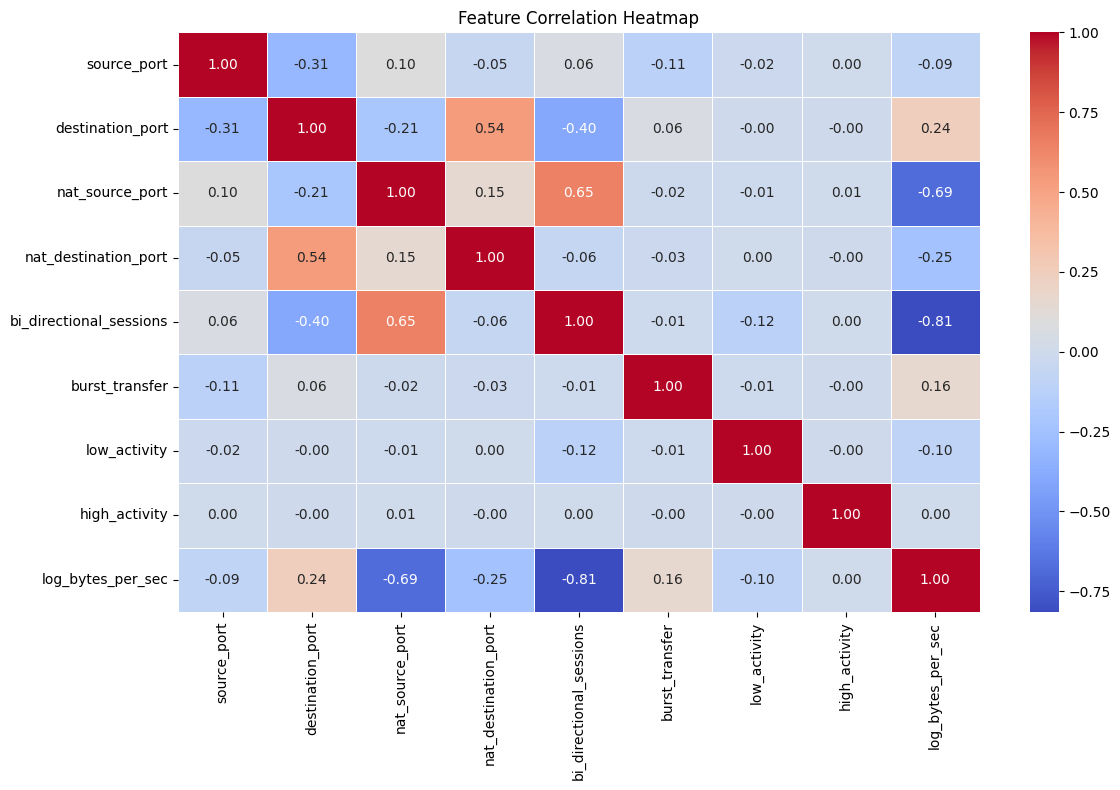

In [80]:
plot_correlation_matrix(df[final_columns], figsize=(12, 8))


-- here we can see that 'log_bytes_per_sec' is highly correlated with 'nat_source_port' and 'bi_directional_sessions'

using Vif for rechecking the columns

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [82]:
## VIF for existing final columns
vif_data = pd.DataFrame()
vif_data["feature"] = df[final_columns].columns
vif_data["VIF"] = [variance_inflation_factor(df[final_columns].values, i) for i in range(df[final_columns].shape[1])]

print(vif_data)


                   feature  VIF
0              source_port   10
1         destination_port    2
2          nat_source_port    4
3     nat_destination_port    2
4  bi_directional_sessions    6
5           burst_transfer    1
6             low_activity    1
7            high_activity    1
8        log_bytes_per_sec    6


In [83]:
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data


In [84]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received', 'bytes_per_sec', 'packets_per_sec', 'bytes_ratio',
       'packets_ratio', 'bi_directional_sessions', 'burst_transfer',
       'low_activity', 'high_activity', 'log_bytes', 'log_bytes_sent',
       'log_bytes_received', 'log_bytes_ratio', 'log_bytes_per_sec',
       'log_packets', 'log_elapsed', 'log_packets_per_sec'],
      dtype='object')

In [85]:
## considering all the columns for VIF calculation
calculate_vif(df, ['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received', 'bytes_per_sec', 'packets_per_sec', 'bytes_ratio',
       'packets_ratio', 'bi_directional_sessions', 'burst_transfer',
       'low_activity', 'high_activity', 'log_bytes', 'log_bytes_sent',
       'log_bytes_received', 'log_bytes_ratio', 'log_packets', 'log_elapsed',
       'log_packets_per_sec', 'log_bytes_per_sec'])


d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packag

,feature,VIF
0,source_port,1
1,destination_port,2
2,nat_source_port,2
3,nat_destination_port,2
4,bytes,inf
5,bytes_sent,inf
6,bytes_received,inf
7,packets,inf
8,elapsed_time_(sec),2
9,pkts_sent,inf


In [86]:
## select the values with VIF < 5
vif_data = calculate_vif(df, ['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received', 'bytes_per_sec', 'packets_per_sec', 'bytes_ratio',
       'packets_ratio', 'bi_directional_sessions', 'burst_transfer',
       'low_activity', 'high_activity', 'log_bytes', 'log_bytes_sent',
       'log_bytes_received', 'log_bytes_ratio', 'log_packets', 'log_elapsed',
       'log_packets_per_sec', 'log_bytes_per_sec']).reset_index(drop=True)


d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\code\interview_assignment\.venv\Lib\site-packag

In [87]:
vif_data.sort_values(by='VIF', ascending=True, inplace=True)


In [88]:
vif_data


,feature,VIF
18,high_activity,1
14,packets_ratio,1
0,source_port,1
17,low_activity,1
13,bytes_ratio,2
1,destination_port,2
2,nat_source_port,2
8,elapsed_time_(sec),2
3,nat_destination_port,2
16,burst_transfer,2


In [89]:
## select the values with VIF < 5
vif_data[vif_data['VIF'] < 5].sort_values(by='VIF', ascending=True)


,feature,VIF
18,high_activity,1
14,packets_ratio,1
0,source_port,1
17,low_activity,1
13,bytes_ratio,2
1,destination_port,2
2,nat_source_port,2
8,elapsed_time_(sec),2
3,nat_destination_port,2
16,burst_transfer,2


In [90]:
final_columns_vif = vif_data[vif_data['VIF'] < 5]['feature'].tolist()
final_columns_vif


['high_activity',
 'packets_ratio',
 'source_port',
 'low_activity',
 'bytes_ratio',
 'destination_port',
 'nat_source_port',
 'elapsed_time_(sec)',
 'nat_destination_port',
 'burst_transfer',
 'bytes_per_sec']

In [97]:
df.columns


Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_(sec)', 'pkts_sent',
       'pkts_received', 'bytes_per_sec', 'packets_per_sec', 'bytes_ratio',
       'packets_ratio', 'bi_directional_sessions', 'burst_transfer',
       'low_activity', 'high_activity', 'log_bytes', 'log_bytes_sent',
       'log_bytes_received', 'log_bytes_ratio', 'log_bytes_per_sec',
       'log_packets', 'log_elapsed', 'log_packets_per_sec'],
      dtype='object')

In [104]:
# df.plot(x='action', y='bytes', kind='bar') # or kind='line', etc.
df_agg_1 = df.groupby('action').agg(
    bytes_ = ('bytes', 'sum'),
    packets_ = ('packets', 'sum'),
    bytes_sent = ('bytes_sent', 'sum'),
    bytes_received = ('bytes_received', 'sum'),
    packets_sent = ('pkts_sent', 'sum'),
    packets_received = ('pkts_received', 'sum')
)
df_agg_1


,bytes_,packets_,bytes_sent,bytes_received,packets_sent,packets_received
action,,,,,,
allow,6362320174,6709481,1464703611,4897616563,2683186,4026295
deny,732987,8072,730355,2632,8056,16
drop,797658,11635,797658,0,11635,0
reset-both,8497,90,7657,840,78,12


In [108]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[
#     go.Bar(name='Bytes Sent', x=df_agg_1.index, y=df_agg_1['bytes_sent']),
#     go.Bar(name='Bytes Received', x=df_agg_1.index, y=df_agg_1['bytes_received']),
# ])
# fig.update_layout(
#     barmode='stack',
#     title='Total Bytes Sent & Received by Action',
#     xaxis_title='Action',
#     yaxis_title='Total Bytes'
# )
# # st.plotly_chart(fig)



In [112]:
# fig = go.Figure(data=[
#     go.Bar(name='Packets Sent', x=df_agg_1.index, y=df_agg_1['packets_sent']),
#     go.Bar(name='Packets Received', x=df_agg_1.index, y=df_agg_1['packets_received']),
# ])
# fig.update_layout(
#     barmode='group',
#     # title='Packets Sent vs Received by Action',
#     xaxis_title='Action',
#     yaxis_title='Total Packets'
# )
# st.plotly_chart(fig)


## Save the final data and selected columns to a CSV file

In [92]:

# pd.DataFrame({'selected_columns': final_columns_vif}).to_csv("./data/feature_columns.csv", index=False)


In [93]:
# df[final_columns_vif + ['action']].head()


In [94]:
df.shape


(57170, 28)

In [95]:
dataset_unique = df.drop_duplicates(keep='first')
dataset_unique.shape


(57170, 28)

In [96]:
# dataset_unique[final_columns_vif + ['action']].to_csv("./data/final_data.csv", index=False)
